<h1> <b>DEPENDENCIES</b> </h1>

In [ ]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

In [ ]:
# Directory for Parasitized images
parasitic = os.listdir("/content/cell_images/Parasitized")

# Directory for Uninfected images
uninfected = os.listdir("/content/cell_images/Uninfected")

In [ ]:
len(parasitic)  #total images of Parasitized images

13780

<h1> <b>DATA VISUALIZATION</b> </h1>

<h2> <b> PARASITIZED IMAGES</b> </h2>

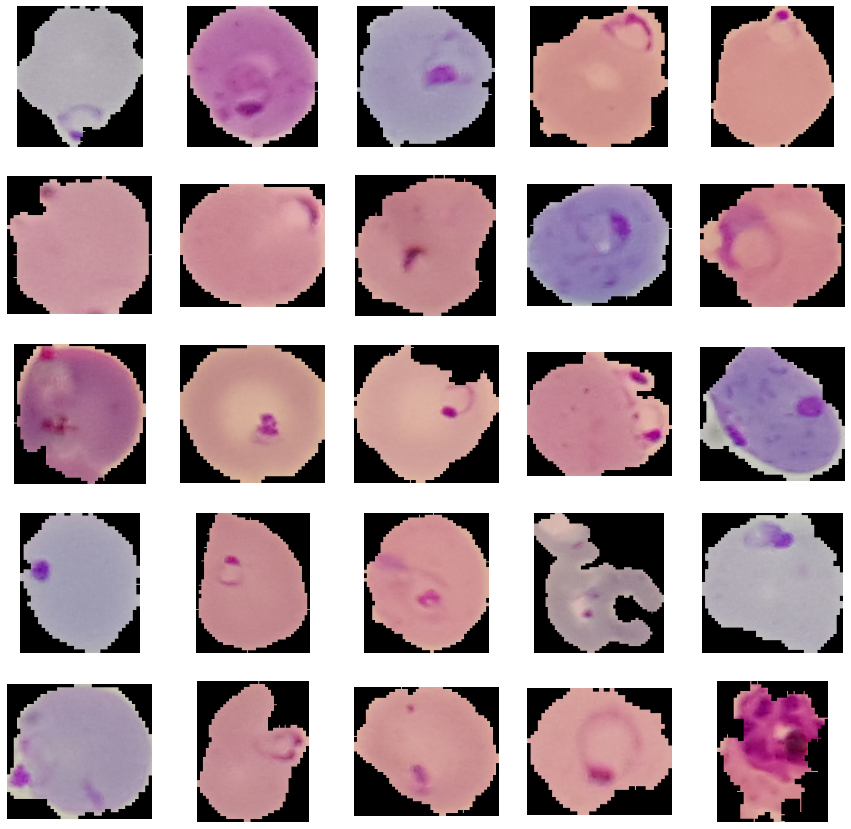

In [ ]:
#taking random 25 random samples from PARASITIZED folder
filenames = random.sample(os.listdir("/content/cell_images/Parasitized"),25)   
plt.figure(figsize=(15, 15)) 

#Displaying 25 sample
for i in range(1, len(filenames)+1):
    row = i
    image = plt.imread('/content/cell_images/Parasitized/' + filenames[i-1])
    plt.subplot(5, 5, row)
    plt.axis("off")
    plt.imshow(image)
plt.show()


<h2><b>UNINFECTED IMAGES</b></h2>





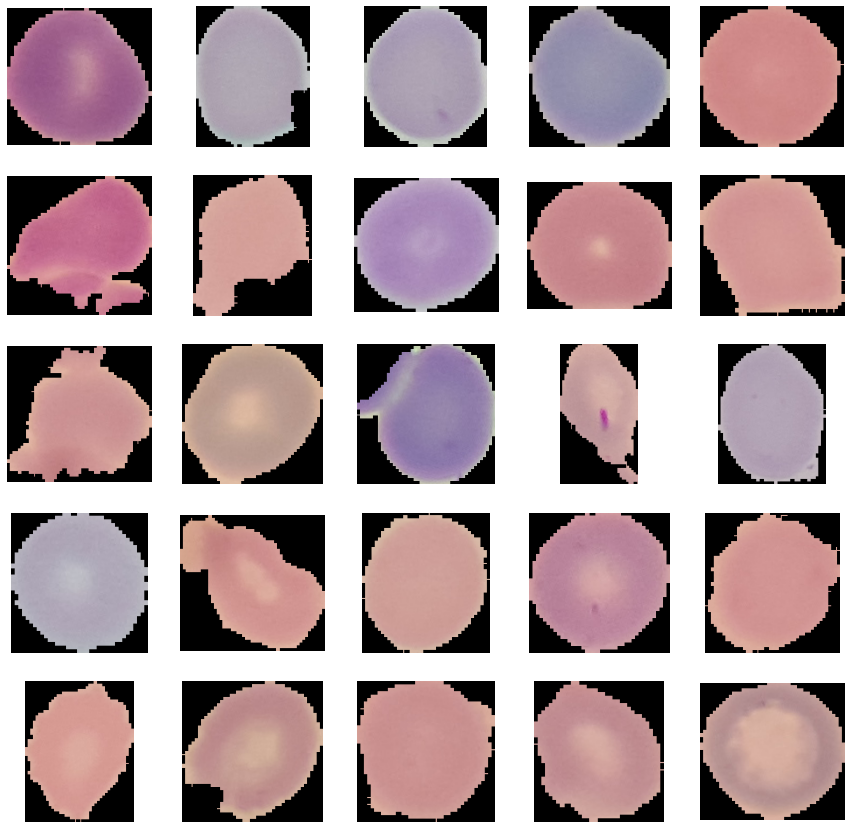

In [ ]:
#taking random 25 random samples from UNINFECTED folder
filenames = random.sample(os.listdir("/content/cell_images/Uninfected"),25)
plt.figure(figsize=(15, 15)) 

#Displaying 25 sample
for i in range(1, len(filenames)+1):
    row = i
    image = plt.imread('/content/cell_images/Uninfected/' + filenames[i-1])
    plt.subplot(5, 5, row)
    plt.axis("off")
    plt.imshow(image)
plt.show()


<h1> <b>DATA PREPROCESSING</b> </h1>

<p> <b>DATA AUGMENTATION</b> <br>
We are doing data augmentation and splitting the data in training and validation set.</p>

*   Setting split equal to 0.05%
*   Shape of image is (64,64,3)




In [ ]:
data = ImageDataGenerator(rescale=1/255.0,rotation_range=0.4,width_shift_range=0.3,height_shift_range=0.3,
                          shear_range=0.2,zoom_range=0.4,horizontal_flip=True,validation_split=0.05)

train = data.flow_from_directory(
    "/content/cell_images",
    target_size=(64,64),
    class_mode = "binary",
    subset = "training",
    batch_size=32,
    shuffle=True
    
)

test = data.flow_from_directory(
    "/content/cell_images",
    target_size=(64,64),
    class_mode = "binary",
    subset = "validation",
    shuffle = True
    
)

Found 26182 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


<h1> <b>BUILDING MODEL USING VGG16 </b> </h1>

<h3> <b>ABOUT VGG16</b> </h3>

*   VGG16 is a convolution neural net(CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014.
*   By default, it loads weights pre-trained on ImageNet.
*   The default input size for this model is 224x224.



In [ ]:
#using imagenet wights and setting the shape as (64,64,3) as our image is of 64,64 and has 3 channels
model = VGG16( include_top=False, weights ="imagenet", input_shape=(64,64,3))  
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

In [ ]:
#Printing the names of all the layers present in the model and setting trainable as False

for i in range(len(model.layers)):
  print(i,model.layers[i])
  model.layers[i].trainable=False

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4932e70588>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa3c9080>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa3c9438>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f48fa3c97f0>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa1bc4e0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa19c358>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f48fa19c780>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa19cfd0>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa18edd8>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa1a9160>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f48fa1a9ac8>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f48fa1c45f8>
12 <tensorflow.python.ke

In [ ]:
# Adding the custom layers to the model

l = GlobalAveragePooling2D()(model.output)
l2 = Dropout(0.2)(l)
l3 = Dense(128, activation="relu")(l2)
l4 = Dropout(0.2)(l3)
l5 = Dense(1,activation="sigmoid")(l4)

#creating the new model by adding the VGG model's input as Input of the new model and l5 layer of our custom model as Output.
new_model = Model(inputs= model.input, outputs= l5)


In [ ]:
# New Model
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)      

<h2> <b> Compiling the new model </b> </h2>

In [ ]:
# Using Adam as the optimizer and loss as binary cross entropy as there are only 2 classes
adam = Adam(learning_rate=0.001)
new_model.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])

<h2> <b> Training the new model </b> </h2>

In [ ]:
his = new_model.fit_generator(train,epochs=10,validation_data=test)

Epoch 1/10
819/819 [==============================] - 79s 96ms/step - loss: 0.4092 - accuracy: 0.8150 - val_loss: 0.3671 - val_accuracy: 0.8452
Epoch 2/10
819/819 [==============================] - 79s 97ms/step - loss: 0.4029 - accuracy: 0.8173 - val_loss: 0.3816 - val_accuracy: 0.8401
Epoch 3/10
819/819 [==============================] - 79s 96ms/step - loss: 0.4026 - accuracy: 0.8189 - val_loss: 0.3876 - val_accuracy: 0.8307
Epoch 4/10
819/819 [==============================] - 79s 97ms/step - loss: 0.4022 - accuracy: 0.8196 - val_loss: 0.3516 - val_accuracy: 0.8452
Epoch 5/10
819/819 [==============================] - 79s 96ms/step - loss: 0.3972 - accuracy: 0.8240 - val_loss: 0.3715 - val_accuracy: 0.8285
Epoch 6/10
819/819 [==============================] - 79s 97ms/step - loss: 0.3974 - accuracy: 0.8226 - val_loss: 0.3637 - val_accuracy: 0.8430
Epoch 7/10
819/819 [==============================] - 79s 96ms/step - loss: 0.4003 - accuracy: 0.8204 - val_loss: 0.3657 - val_accuracy:

<h2> <b> Plotting the Accuracy, Validation Accuracy, Loss and Validation Loss </b> </h2>

[]

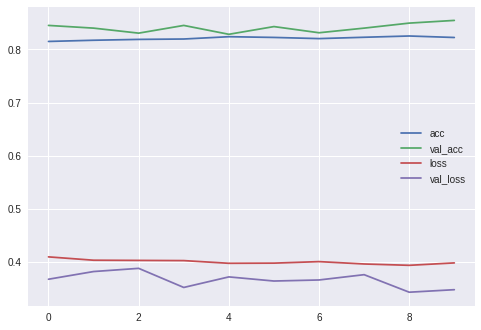

In [ ]:
plt.style.use("seaborn")
plt.plot(his.history['accuracy'],label="acc")
plt.plot(his.history['val_accuracy'],label="val_acc")
plt.plot(his.history['loss'],label="loss")
plt.plot(his.history['val_loss'],label="val_loss")
plt.legend()
plt.plot()

<h2> <b> Testing the model </b> </h2>

In [ ]:
#testing on train set
new_model.evaluate(train)  

819/819 [==============================] - 74s 91ms/step - loss: 0.3638 - accuracy: 0.8424


[0.36383408308029175, 0.8423725962638855]

In [ ]:
#testing  on test set
print("TESTING ACCURACY :", new_model.evaluate(test)[1])  

43/43 [==============================] - 4s 92ms/step - loss: 0.3421 - accuracy: 0.8597
TESTING ACCURACY : 0.8597383499145508
